# Fuhlsbüttel

I will do a explorative descriptive analysis on weather data provided by Wetterkontor for Hamburg Airport (Flughafen Fuhlsbüttel) from 27.07.2011 to 08.08.2018 consisting of 
- Minimum Temp. (°C) 
- Maximum Temp. (°C) 
- Average Temp. (°C) 
- Precipitation (l/m²) 
- Sunshine duration (h) 
- Max. gust of wind (Bft) 

[Data Source](https://www.wetterkontor.de/de/wetter/deutschland/rueckblick.asp?id=80)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
import scipy.stats as st
import re
import datetime as dt

In [2]:
# Import data from CSV file to pandas DataFrame 
df = pd.read_csv("data/fuhlsbuettel.csv", sep=",", parse_dates=True)

In [4]:
# df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [5]:
df.head()

,Date,MinTemp,MaxTemp,AverageTemp,Precipitation,SunshineDuration,MaxWindGust
0,03.07.2008,18.4,30.1,22.8,17.8,7.2,4.0
1,04.07.2008,14.5,18.5,15.6,37.8,0.0,6.0
2,05.07.2008,13.9,24.1,18.5,0.0,7.4,4.0
3,06.07.2008,12.9,25.5,19.1,0.4,4.9,5.0
4,07.07.2008,11.5,20.4,15.7,7.2,4.3,8.0


In [6]:
df.describe()

,MinTemp,MaxTemp,AverageTemp,Precipitation,SunshineDuration
count,3691.000000,3691.000000,3691.000000,3691.000000,3691.000000
mean,5.761636,13.712517,9.854348,2.057870,4.423219
std,6.320783,8.196158,6.985165,4.283778,4.371667
min,-17.700000,-8.700000,-12.100000,0.000000,0.000000
25%,1.300000,7.500000,4.800000,0.000000,0.200000
50%,6.100000,13.900000,10.000000,0.100000,3.200000
75%,10.800000,20.100000,15.400000,2.200000,7.550000
max,21.600000,36.400000,28.000000,47.100000,15.600000


I am interested in the relationship between sunshine duration and average temperatur. 

In [7]:
# Copy the values in the column named 'SunshineDuration' to an array with the appropiate length 
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
SunshineDuration = df[['SunshineDuration']].values.reshape(len(df))

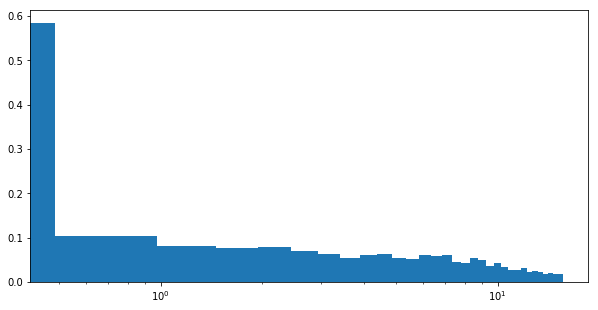

In [8]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.hist(SunshineDuration, 32, density=True)
plt.show()

I have set the x-scale to log(arithmic) because there are a lot of small values. The data is not normally distributed, which can be attributed to the definition of sunshine depending of a treshold. 

The number of bins is an approximate multiple of the maximum value (15.6 hours) * 2. 

**On sunshine duration** 

> The period of time during which sunshine is detected is called sunshine duration. The determination of whether sunshine is detected in the meteorological sense leads to a yes / no statement about one of two possible states. (...) For the objective and reproducible determination of sunshine, the irradiance of direct solar radiation is used. To be registered as sunshine, direct solar radiation must exceed the threshold of 120 W/m². The sunshine duration of a day is the sum of all periods when this threshold was exceeded. (Regulations and operating documents No. 3 (VuB 3), observer manual (BHB) of the German Weather Service) 

[Source](https://www.dwd.de/DE/leistungen/pbfb_verlag_vub/pdf_einzelbaende/vub_3_bhb_gesamt_pdf.pdf)

In [9]:
# I order to visualize the data on a horizontal axis I need to transpose the column to a row. 
df_Sunshine = pd.DataFrame(SunshineDuration).transpose()

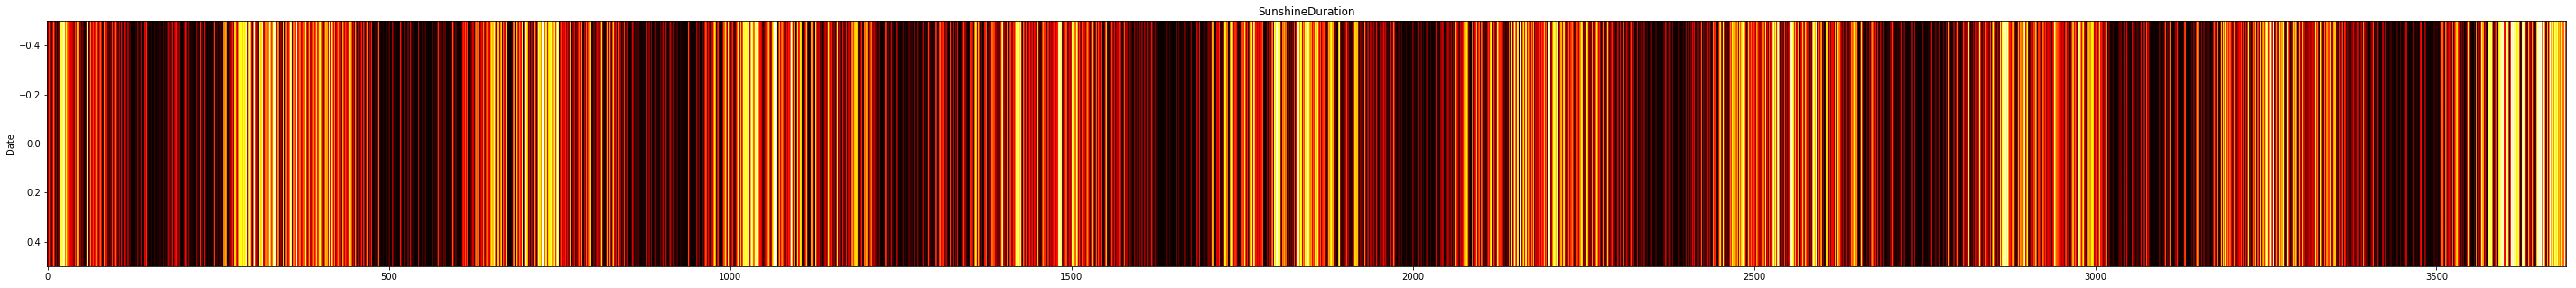

In [11]:
plt.figure(figsize=(50, 5))
plt.ylabel('Date')
plt.title('SunshineDuration')
plt.imshow (df_Sunshine, cmap='hot', interpolation='lanczos', aspect='auto')

I will now repeat the same steps for the average temperature. 

In [12]:
# Copy the values in the column named 'SunshineDuration' to an array with the appropiate length 
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
AverageTemp = df[['AverageTemp']].values.reshape(len(df))

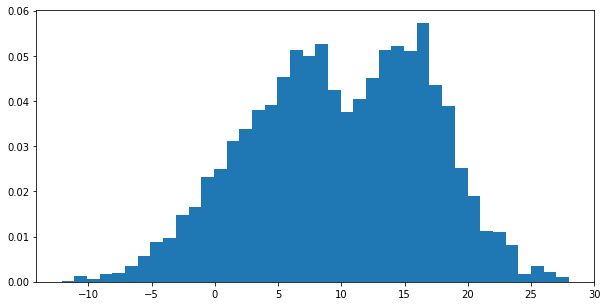

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(AverageTemp, 40, density=True)
plt.show()

I have kept the x-scale linear. Interestingly the data is _not_ normally distributed, but displays a [bimodal distribution](https://en.wikipedia.org/wiki/Multimodal_distribution). 

The number of bins is an approximate of the difference between the minimum (-12) and the maximum value (28). 

In [14]:
df_AverageTemp = pd.DataFrame(AverageTemp).transpose()

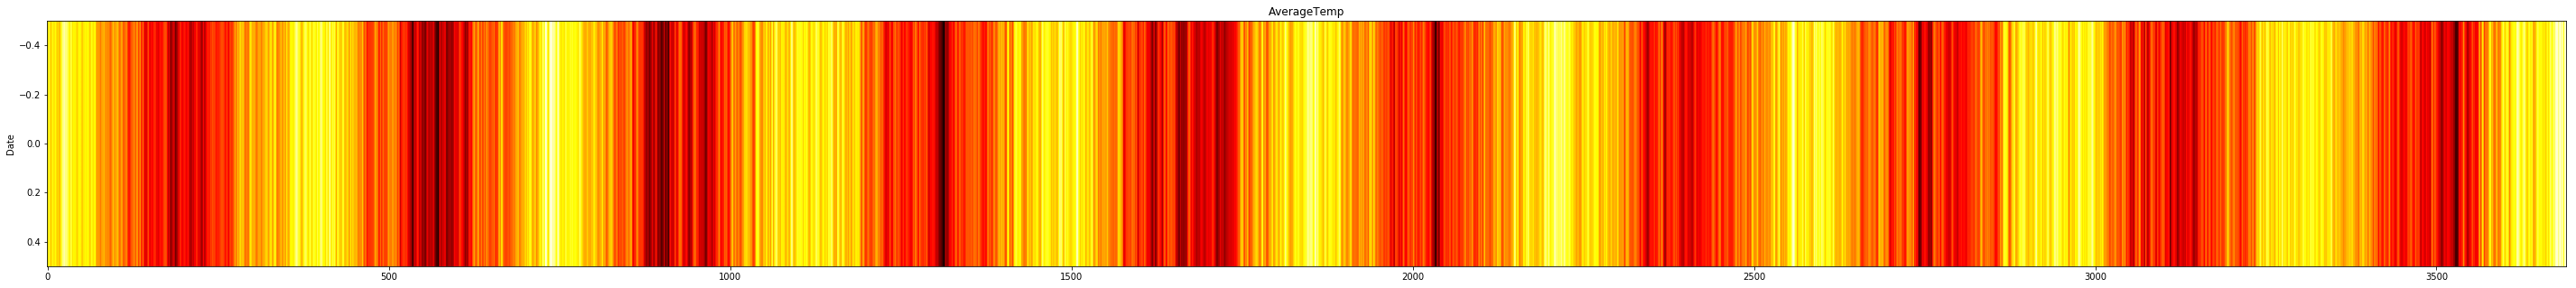

In [15]:
plt.figure(figsize=(50, 5))
plt.ylabel('Date')
plt.title('AverageTemp')
plt.imshow (df_AverageTemp, cmap='hot', interpolation='lanczos', aspect='auto')

## Possible next steps 

- Computing the “best fit” for the univariate distribution of variables using the module ```fitter```. Can we make a prediction for future data? 
- Splitting the dataset into winter and summer subsets and plotting univariate distributions. Does this subsetting explain the aforementioned bimodal distribution? 
- Can we establish a correlation between e.g. sunshine duration and average temperature?

In order to select specific rows I will match a partial string (the month of origin), see https://stackoverflow.com/questions/11350770/

In [16]:
df_summer = df[df['Date'].str.contains(".04.|.05.|.06.|.07.|.08.|.09.")]
df_winter = df[df['Date'].str.contains(".01.|.02.|.03.|.10.|.11.|.12.")]

In [17]:
df_summer.describe()

,MinTemp,MaxTemp,AverageTemp,Precipitation,SunshineDuration
count,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000
mean,9.834422,19.897216,14.964026,2.127516,6.529818
std,4.446393,5.218301,4.444726,4.463327,4.444178
min,-6.800000,3.300000,0.100000,0.000000,0.000000
25%,7.000000,16.600000,12.300000,0.000000,2.700000
50%,10.500000,20.000000,15.300000,0.000000,6.300000
75%,13.000000,23.200000,17.800000,2.200000,10.000000
max,21.600000,36.400000,28.000000,47.100000,15.600000


In [18]:
df_winter.describe()

,MinTemp,MaxTemp,AverageTemp,Precipitation,SunshineDuration
count,3418.000000,3418.000000,3418.000000,3418.000000,3418.000000
mean,5.378174,13.148771,9.387741,2.045992,4.233090
std,6.326007,8.182266,6.985033,4.247636,4.325533
min,-17.700000,-8.700000,-12.100000,0.000000,0.000000
25%,0.925000,7.000000,4.300000,0.000000,0.100000
50%,5.500000,12.800000,9.150000,0.100000,2.900000
75%,10.400000,19.500000,14.975000,2.200000,7.300000
max,21.600000,36.400000,28.000000,47.100000,15.600000


In [19]:
# Copy the values in the column named 'AverageTemp' to an array with the appropiate length 
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
AverageTemp_summer = df_summer[['AverageTemp']].values.reshape(len(df_summer))
AverageTemp_winter = df_winter[['AverageTemp']].values.reshape(len(df_winter))

In [20]:
loc_summer = 14.964026
scale_summer = 4.444726
lower = scipy.stats.norm.ppf(0.01,loc_summer,scale_summer)
upper = scipy.stats.norm.ppf(0.99,loc_summer,scale_summer)
x_summer = scipy.linspace(lower,upper,100)

y_summer = scipy.stats.norm.pdf(x_summer,loc_summer,scale_summer)

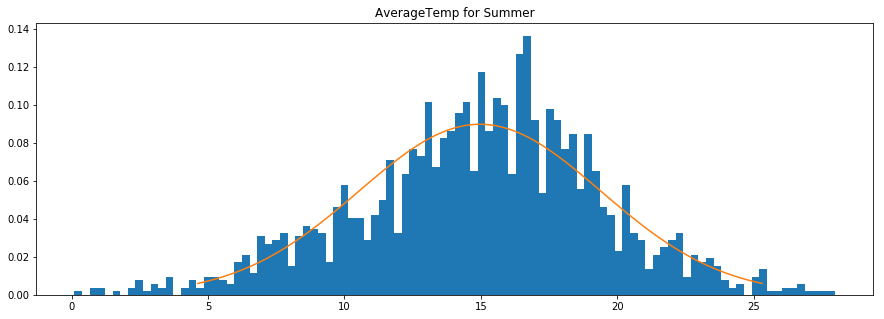

In [22]:
plt.figure(figsize=(15, 5))
plt.title('AverageTemp for Summer')
plt.hist(AverageTemp_summer, 100, density=True)
plt.plot(x_summer,y_summer)
plt.show()

In [23]:
loc_winter = 9.387741
scale_winter = 6.985033
lower = scipy.stats.norm.ppf(0.01,loc_winter,scale_winter)
upper = scipy.stats.norm.ppf(0.99,loc_winter,scale_winter)
x_winter = scipy.linspace(lower,upper,100)

y_winter = scipy.stats.norm.pdf(x_winter,loc_winter,scale_winter)

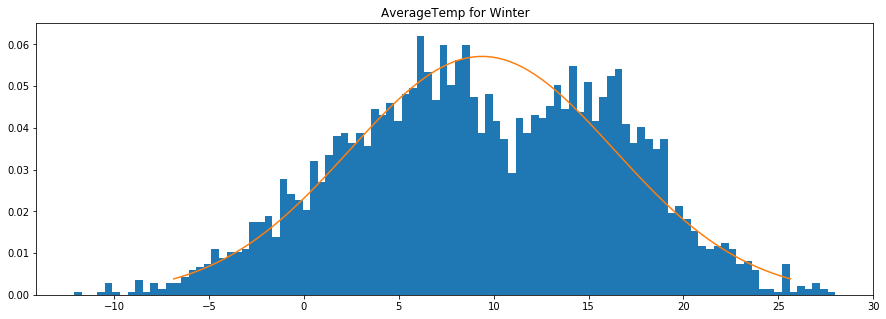

In [24]:
plt.figure(figsize=(15, 5))
plt.title('AverageTemp for Winter')
plt.hist(AverageTemp_winter, 100, density=True)
plt.plot(x_winter,y_winter)
plt.show()

## Intermediate result and proceeding 

- The split does not resolve the bimodal distribution. 
- I will subset the winter subset into years and try to group these subsets (“cold winters” and “warm winters”). 

In [32]:
df['Date'] = pd.to_datetime(df['Date'])

In [33]:
pd.to_datetime(df_winter['Date']).head()

90   2008-01-10
91   2008-02-10
92   2008-03-10
93   2008-04-10
94   2008-05-10
Name: Date, dtype: datetime64[ns]

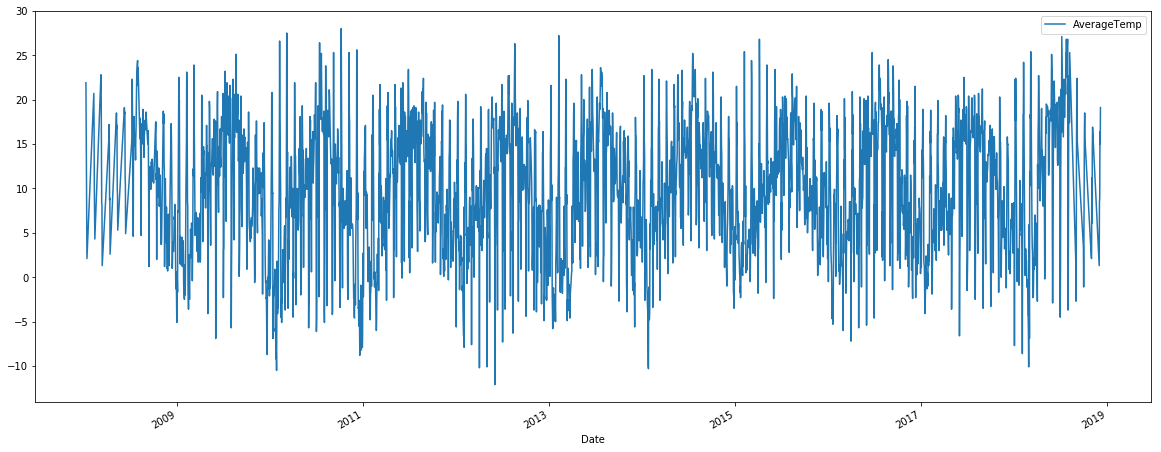

In [34]:
df.plot(x = 'Date', y = 'AverageTemp', figsize=(20, 8))

In [35]:
df_winter_0809 = df[(df['Date'] > '2008-10-01') & (df['Date'] < '2009-04-01')]
df_winter_0910 = df[(df['Date'] > '2009-10-01') & (df['Date'] < '2010-04-01')]
df_winter_1011 = df[(df['Date'] > '2010-10-01') & (df['Date'] < '2011-04-01')]
df_winter_1112 = df[(df['Date'] > '2011-10-01') & (df['Date'] < '2012-04-01')]
df_winter_1213 = df[(df['Date'] > '2012-10-01') & (df['Date'] < '2013-04-01')]
df_winter_1314 = df[(df['Date'] > '2013-10-01') & (df['Date'] < '2014-04-01')]
df_winter_1415 = df[(df['Date'] > '2014-10-01') & (df['Date'] < '2015-04-01')]
df_winter_1516 = df[(df['Date'] > '2015-10-01') & (df['Date'] < '2016-04-01')]
df_winter_1617 = df[(df['Date'] > '2016-10-01') & (df['Date'] < '2017-04-01')]
df_winter_1718 = df[(df['Date'] > '2017-10-01') & (df['Date'] < '2018-04-01')]

In [36]:
df_winter_0809.describe()

,MinTemp,MaxTemp,AverageTemp,Precipitation,SunshineDuration
count,165.000000,165.000000,165.000000,165.000000,165.000000
mean,3.172121,9.595152,6.552121,1.789697,2.952727
std,5.533926,7.163047,6.055340,4.165108,3.697734
min,-8.900000,-3.600000,-5.100000,0.000000,0.000000
25%,-0.300000,4.100000,2.000000,0.000000,0.000000
50%,2.500000,8.300000,5.600000,0.200000,1.000000
75%,6.400000,12.900000,9.900000,2.000000,5.200000
max,16.300000,31.000000,23.900000,32.300000,15.200000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3691 entries, 0 to 3690
Data columns (total 7 columns):
Date                3691 non-null datetime64[ns]
MinTemp             3691 non-null float64
MaxTemp             3691 non-null float64
AverageTemp         3691 non-null float64
Precipitation       3691 non-null float64
SunshineDuration    3691 non-null float64
MaxWindGust         3691 non-null object
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 201.9+ KB


In [42]:
winter_mean_temperatures = pd.DataFrame(df_winter_0809_mean, df_winter_0910_mean, df_winter_1011_mean, df_winter_1112_mean, df_winter_1213_mean, df_winter_1314_mean, df_winter_1415_mean, df_winter_1516_mean, df_winter_1617_mean, df_winter_1718_mean)

TypeError: __init__() takes from 1 to 6 positional arguments but 11 were given